<a href="https://colab.research.google.com/github/sumeethkumar12/dl/blob/main/ai21btech11008_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt



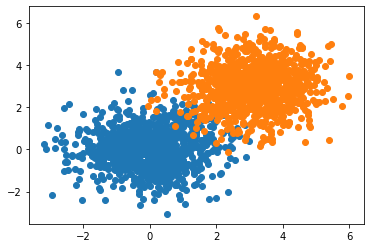

torch.Size([2000, 3])
torch.Size([2000, 1])


In [ ]:


D1=torch.normal(0.0, 1.0,size=[1000,2])
D2=torch.normal(3.0, 1.0,size=[1000,2])

plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.show()

X=torch.empty(2000,D1.size(1)+1).fill_(1)
X[::2,:2] = D1
X[1::2,:2] = D2
print(X.shape)

# prepare the labels
Y=torch.empty(2000,1)
Y[::2,:2] = 1.0
Y[1::2,:2] = -1.0
print(Y.shape)

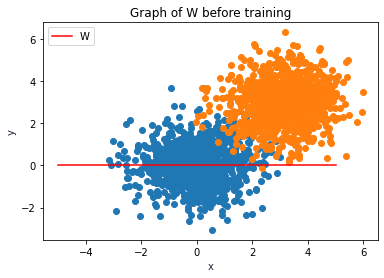

In [ ]:

W = torch.zeros(X.size(1))

x = np.linspace(-5,5,1000)
y = np.zeros(1000,) 
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W before training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.show()

In [ ]:
def train_perceptron(x, y, w, nb_epochs_max):  
  for e in range(nb_epochs_max):
    nb_changes = 0
    for i in range(x.size(0)):
      if x[i].dot(w) * y[i] <= 0:
        w = w + y[i] * x[i]
        nb_changes = nb_changes + 1
    #print('Number of changes: %d'%nb_changes) # prints the number of changes every epoch
    if nb_changes == 0:
        print('Early stopping at epoch number %d',e) 
        break;
  print('Number of changes: %d'%nb_changes)  # prints the number of chages in the end  
  return w


Number of changes: 49


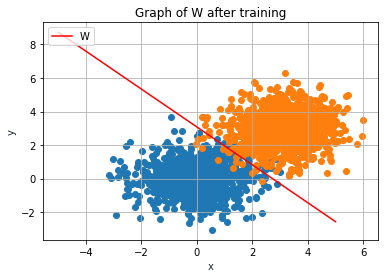

In [ ]:
W = train_perceptron(X,Y, W, 1000)
x = np.linspace(-5,5,100)
y = -(W[0].item()/(W[1].item() + 1e-6))*x - (W[2].item()/(W[1].item() + 1e-6))

plt.plot(x, y, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.grid()
plt.show()